<h1>Figure 4</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.formula.api import ols
from Bio import SeqIO
import statsmodels.api as sm

#load the function for processing growth rate data from script GR.py
%cd Scripts
%run GR.py
%cd ..

/home/tobias/Dropbox/Python/18 Codon Selection/Scripts
/home/tobias/Dropbox/Python/18 Codon Selection


/home/tobias/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h2>Media dependence of maxCFluc growth reduction</h2>
<p>The following files contain data used in the analyses for this figure:</p>
<table>
    <tr>
        <th>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="RawData/110522_2uC_media_dependence.csv" target=_blank>110522 2uC media dependence.csv</a></td>
        <td>Growth rates for vector control yeast in media with differing supplementation.</td>
    </tr>
    <tr>
    <td><a href="RawData/110522_2umax_media_dependence.csv" target=_blank>110522 2umax media dependence.csv</a></td>
        <td>Growth rates for maxFLuc expressing yeast in media with differing supplementation.</td>
    </tr>
</table>

In [2]:
GR_C = process_GR('RawData/110522_2uC_media_dependence.csv', normalise=False)
GR_max = process_GR('RawData/110522_2umax_media_dependence.csv', normalise=False)
GR = pd.concat([GR_C,GR_max], ignore_index=True)
#normalise all values to the mean of 2u:C
normval = np.mean(GR.loc[GR['Plasmid'] == '2u:C+NS']['Rel_GR'])
GR['Rel_GR'] = GR['Rel_GR'] / normval
#split the factor at the colon to separate the plasmids and growth conditions
newcols = pd.DataFrame(GR.Plasmid.str.split('+',1).tolist(),columns = ['Plasmid','Supplementation'])
GRsplit = pd.concat([newcols,GR['Rel_GR']],axis=1)
#exclude cells marked as CONTAMINATION
GRsplit = GRsplit.loc[GRsplit['Plasmid'] != 'CONTAMINATION']

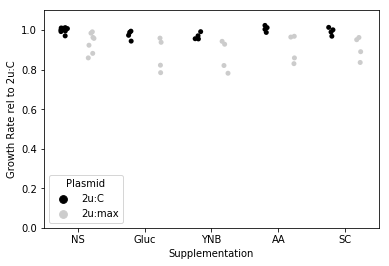

In [3]:
#plot data
sns.set_palette(['#000000','#cccccc'])
sns.stripplot(x='Supplementation',y='Rel_GR',data=GRsplit,hue='Plasmid',dodge=True,jitter=True)
plt.ylabel('Growth Rate rel to 2u:C')
plt.ylim(0,1.1)
#plt.savefig('Figure 4a.svg')
plt.show()

In [4]:
#statistics - significance of difference to unsupplemented 2u:max
#do statistics only for the 2u:max series

model = ols('Rel_GR~Plasmid',
                data=GR_max).fit()
                
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

            sum_sq    df         F    PR(>F)
Plasmid   0.002960   5.0  1.929493  0.139139
Residual  0.005522  18.0       NaN       NaN


<h1>tRNA limitations</h1>
<p>The following files contain data used for these analyses:</p>
<table>
    <tr>
        <th width=50%>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="RawData/181114_tRNA_supply.csv" target=_blank>181114_tRNA_supply.csv</a></td>
        <td>Tabulated tRNA gene copy numbers for the decoding tRNAs for each codon, calculated fromt he decoding scheme published in <a href="https://www.ncbi.nlm.nih.gov/pubmed/24357599" target=_blank>Chu <i>et al.</i> 2014</a></td>
    </tr>
    <tr>
        <td><a href="RawData/181115_FLucs.fasta" target=_blank>181115_FLucs.fasta</a></td>
        <td>FASTA file of the firelfy luciferase sequences used in <a href="https://www.ncbi.nlm.nih.gov/pubmed/24357599" target=_blank>Chu <i>et al.</i> 2014</a></td>
    </tr>
</table>

In [5]:
#read in tRNA gene copy number data
tsupply = pd.read_csv('RawData/181114_tRNA_supply.csv')
#read in CFLuc sequences
fastas = SeqIO.parse('RawData/181115_FLucs.fasta', 'fasta')
FLucs = []
for fasta in fastas:
    FLucs.append(str(fasta.seq))
fastas.close()
#calculate the tRNA copy number supply index 
tSI = []
for FLuc_variant in FLucs:
    FLuc_variant = FLuc_variant.replace('T','U')
    nt = 0
    record = []
    while (nt + 3) < (len(FLuc_variant) - 3):
        this_codon = FLuc_variant[nt:nt+3]
        this_gcn = float(tsupply.loc[tsupply['codon'] == this_codon]['GCN'])
        record.append(this_gcn)
        nt = nt + 3
    tSI.append(np.mean(record))

print('the average tRNA gene copy number for all codons in min/sta/max firefly luciferase is \n' + str(tSI))

the average tRNA gene copy number for all codons in min/sta/max firefly luciferase is 
[7.597069597069597, 10.164835164835164, 12.587912087912088]


<h1>Ribosome limitations</h1>
<p>The following files contain data used for these analyses:</p>
<table>
    <tr>
        <th width=50%>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="RawData/110512_2u_StaFLuc_stability_1.jpg" target=_blank>110512 2µ StaFLuc stability 1.jpg</a>,<a href="RawData/110512_2u_StaFLuc_stability_2.jpg" target=_blank>110512 2µ StaFLuc stability 2.jpg</a></td>
        <td>Image files of anti-firefly luciferase blots following cycloheximide treatment of 2u:sta containing cells. <br /> Lane order: t0 (2 &mu;l), t0 (5 &mu;l), t40 (2 &mu;l), t40 (5 &mu;l)</td>
    </tr>
    <tr>
        <td><a href="RawData/110512_2u_StaFLuc_Stability.csv" target=_blank>110512 2u StaFLuc Stability.csv</a></td>
        <td><a href="https://imagej.nih.gov/ij/index.html" tagret=_blank>ImageJ</a> quantifications of 2 &mu;l band intensities of the blot images.</td>
    </tr>
    <tr>
        <td><a href="RawData/110512_2u_StaFLuc_quanti.jpg" target=_blank>110512 2u StaFLuc quanti.jpg</a></td>
        <td>Image file of anti-firefly luciferase blots from quantified cell extracts, next to known amounts of purified luciferase. <br />Extract concentration was 4x10<sup>8</sup> cells per ml.<br /> Lane order: Extract 1 5 &mu;l; extract 1 2 &mu;l; extract 2 5 &mu;l; extract 2 2 &mu;l; extract 3 5 &mu;l; extract 3 2 &mu;l. Standards: Mounting 1/2 dilutions of purified luciferase (<a href="https://www.sigmaaldrich.com/catalog/product/sigma/l9506" target=_blank>Sigma L9506</a>), up to 50 ng in last band. </td>
    </tr>
    <tr>
        <td><a href="RawData/110512_2u_StaFLuc_quanti.csv" target=_blank>110512 2u StaFLuc quanti.csv</a></td>
        <td>ImageJ quantifications of band intensities of the blot images (2 &mu;l bands for the extracts).</td>
    </tr>
</table>

<h2>Firefly luciferase synthesis rates</h2>

In [6]:
###########################estimate firefly luciferase turnover rate##########################
#####import band intensity data
decay_data = pd.read_csv('RawData/110512_2u_StaFLuc_Stability.csv')
#####normalise decay data
bands = list(decay_data['Band'])
decay_norm = [bands[0]/bands[0], bands[1]/bands[0], bands[2]/bands[2],bands[3]/bands[2]]
decay_data['normalised'] = decay_norm
#####fit a global decay curve to the data
def func(x, a):
    return np.exp(-a * x)
popt,pcov = curve_fit(func, decay_data['Time'], decay_data['normalised'],p0=0.005)
Fluc_decay_rate = popt[0]

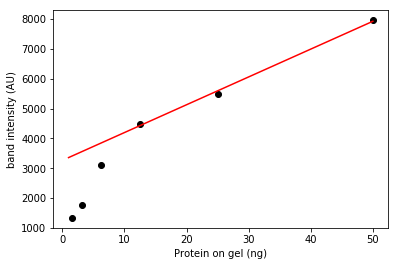

min: 2.10E-14, sta: 4.45E-14, max: 5.94E-14 g per cell


In [7]:
#############################estimate firefly luciferase steady state abundance#########################
blot_data = pd.read_csv('RawData/110512_2u_StaFLuc_quanti.csv')
######plot shows two separate linear relationships. Only last three points used as samples are within this range
fit_data = blot_data.iloc[6:,:]
def func(x, a, b):
    return a*x + b
popt,pcov = curve_fit(func, fit_data['Concentration'], fit_data['Band'])
#plot standard data with fitted curve
plt.scatter(x = blot_data.iloc[3:,]['Concentration'], y = blot_data.iloc[3:,]['Band'])
x=np.linspace(1,50,50)
y=(x * popt[0] + popt[1])
plt.plot(x,y,color='red')
plt.xlabel('Protein on gel (ng)')
plt.ylabel('band intensity (AU)')
plt.show()
######calculate concentration per cell for sta
cell_data = blot_data.iloc[:3,:]
#go through each replicate and calculate staLuc protein per cell (in ng)
luc_on_gel = []
for row in range(cell_data.shape[0]):
    luc_on_gel.append((cell_data.iloc[row]['Band']-popt[1])/popt[0])
luc_on_gel = np.mean(luc_on_gel)
luc_per_cell = luc_on_gel / cell_data.iloc[1]['Concentration']
luc_MW = 60745 #g per mole
staLuc_molec_per_cell = luc_per_cell * 1e-9 / luc_MW *6.023e23
#relative expression levesl for the three luciferases as determined in figure 1
rel_levels = np.array([0.472,1.0,1.336])
abs_levels = rel_levels * luc_per_cell * 1e-9
print(('min: {:.2E}, sta: {:.2E}, max: {:.2E} g per cell').format(abs_levels[0],abs_levels[1],abs_levels[2]))

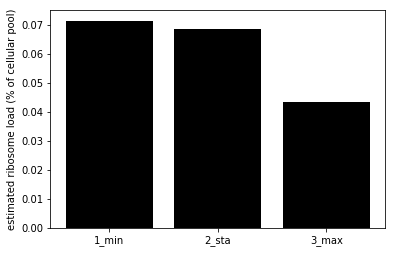

In [8]:
###############################calculate synthesis rates for the three CFLuc variants
####relative expression per cell for min, sta, max as determined in figure 1
rel_levels = np.array([0.472,1.0,1.336])
####relative growth rates for min, sta, max as determined in figure 2
growth_rates = np.array([0.245125,0.238646,0.216104]) / 60
###estimated ribosome transit times in minutes for min, sta, max from PMID 24357599
transit_times = np.array([308.0,141.0,68.6])/60

abs_levels = rel_levels * staLuc_molec_per_cell
synthesis_frequencies = abs_levels * (growth_rates + Fluc_decay_rate)
ribosome_load = synthesis_frequencies * transit_times
rel_ribosome_load = ribosome_load / 185000

plt.close()
plt.bar(['1_min','2_sta','3_max'],rel_ribosome_load,color='black')
plt.ylabel('estimated ribosome load (% of cellular pool)')
#plt.savefig('Figure 4b.svg')
plt.show()

<h2>Proteotoxicity</h2>
<h3>AZC resistance</h3>
<p>The proline analog <a href="https://www.sigmaaldrich.com/catalog/product/sigma/a0760" target=_blank>AZC</a> is incorporated into nascent chains and disrupts their folding, thereby exacerbating protetoxic conditions. Growth rates in the presence of various concentrations of the drug were compared for a yeast transformed with the control plasmid of the maxFLuc expressing plasmid. A four-fold dilution series starting with an AZC concentration of 36 &mu;M was used.</p>

<p>The following files contain data used for these analyses:</p>
<table>
    <tr>
        <th width=50%>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="RawData/180608_AZC_sensitivity_maxCFLuc.csv" target=_blank>180608 AZC sensitivity maxCFLuc.csv</a></td>
        <td>Growth data for control vector and maxFLuc expressing yeast in the absence or presence of AZC.</td>
    </tr>

In [9]:
#read in growth data
GR_AZC = process_GR('RawData/180608_AZC_sensitivity_maxCFLuc.csv', normalise=False, starting_row=8)
#remove data in contaminated wells
GR_AZC = GR_AZC.loc[GR_AZC['Plasmid'] != 'cont']
#switch of "SettingWithCopyWarning"
pd.options.mode.chained_assignment = None 

#separate the factors
GR_split = pd.DataFrame([entries.split(':') for entries in GR_AZC['Plasmid']])
GR_split.columns=['AZC_conc_uM','Plasmid']
GR_split['Rel_GR'] = pd.to_numeric(GR_AZC['Rel_GR'])
GR_split['AZC_conc_uM'] = pd.to_numeric(GR_split['AZC_conc_uM'])
GR_AZC_C = GR_split.loc[GR_split['Plasmid'] == 'C']
GR_AZC_max = GR_split.loc[GR_split['Plasmid'] == 'max']


########convert growth rates to dose response data
#calculate the mean growth rate at zero AZC and use this to normalise the growth rates
C_zero_mean = np.mean(GR_AZC_C.loc[GR_AZC_C['AZC_conc_uM'] == 0]['Rel_GR'])
GR_AZC_C['norm_GR'] = GR_AZC_C['Rel_GR'] / C_zero_mean
#remove data where dose = 0 to enable conversion to log scale
GR_AZC_C = GR_AZC_C.loc[GR_AZC_C['AZC_conc_uM'] != 0]
#Same for max data
max_zero_mean = np.mean(GR_AZC_max.loc[GR_AZC_max['AZC_conc_uM'] == 0]['Rel_GR'])
GR_AZC_max['norm_GR'] = GR_AZC_max['Rel_GR'] / max_zero_mean
GR_AZC_max = GR_AZC_max.loc[GR_AZC_max['AZC_conc_uM'] != 0]


########Do the curve fitting
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y
popt_C, pcov_C = curve_fit(sigmoid, np.log10(GR_AZC_C['AZC_conc_uM']),GR_AZC_C['norm_GR'])
perr_C = np.sqrt(np.diag(pcov_C))
popt_max, pcov_max = curve_fit(sigmoid, np.log10(GR_AZC_max['AZC_conc_uM']),GR_AZC_max['norm_GR'])
perr_max = np.sqrt(np.diag(pcov_max))

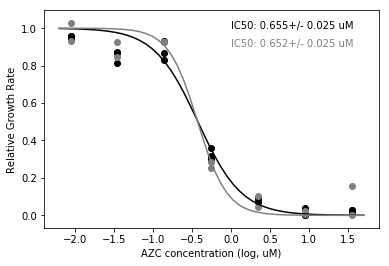

In [9]:
#####generate the plot
#plot the actual data points
plt.scatter(x=np.log10(GR_AZC_C['AZC_conc_uM']),y=GR_AZC_C['norm_GR'],color='black')
plt.scatter(x=np.log10(GR_AZC_max['AZC_conc_uM']),y=GR_AZC_max['norm_GR'],color='grey')
#plot the fitted models
x = np.linspace(-2.2, 1.7, 50)
y_C = sigmoid(x, *popt_C)
y_max = sigmoid(x, *popt_max)
plt.plot(x,y_C,color='black')
plt.plot(x,y_max,color='grey')
#add text and axis labels
label_C = "IC50: " + str("%.3G" %(np.exp(popt_C[0]))) + "+/- " + str("%.2G"%(np.exp(popt_C[0]+perr_C[0])-np.exp(popt_C[0])) + " uM")
plt.text(0,1,label_C,color='black')
label_max = "IC50: " + str("%.3G" %(np.exp(popt_max[0]))) + "+/- " + str("%.2G"%(np.exp(popt_max[0]+perr_C[0])-np.exp(popt_max[0])) + " uM")
plt.text(0,0.9,label_max,color='grey')
plt.xlabel('AZC concentration (log, uM)')
plt.ylabel('Relative Growth Rate')
#plt.savefig('Figure 4d.svg')
plt.show()

<h3>Hsp104 expression levels</h3>
<p>The following files contain data used for these analyses:</p>
<table>
    <tr>
        <th width=50%>File</th>
        <th>Content</th>
    </tr>
    <tr>
    <td><a href="RawData/180627_Hsp104_PGK_high.png" target=_blank>180627_Hsp104_PGK_high.png</a>, <a href="RawData/180627_Hsp104_PGK_low.png" target=_blank>180627_Hsp104_PGK_low.png</a></td>
    <td>Images of anti-Hsp104 and anti-Pgk1 (loading control) blots at low and high exposure.</td>
    </tr>
    <tr>
    <td><a href="RawData/180621_Hsp104.png" target=_blank>180621_Hsp104.png</a></td>
    <td>Image of the anti-Hsp104 blot used in figure 4E.</td>
    </tr>
    <tr>
        <td><a href="RawData/180627_HSP104_quantification.csv" target=_blank>180627_HSP104_quantification.csv</a></td>
        <td>Quantification of the Hsp104/PGK blot data.</td>
    </tr>

/home/tobias/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


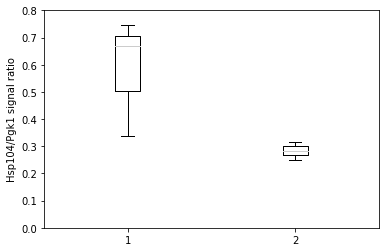

In [10]:
#load quantification data
HSP104 = pd.read_csv('RawData/180627_HSP104_quantification.csv')
HSP104['ratio'] = [HSP104.HSP104.iloc[n] / HSP104.PGK1.iloc[n] for n in range(HSP104.shape[0])]
#plot data
plt.boxplot([HSP104.ratio.iloc[0:3],HSP104.ratio.iloc[4:]])
plt.ylim((0,0.8))
plt.ylabel('Hsp104/Pgk1 signal ratio')
#plt.savefig('Hsp104_expression.svg')
plt.show()